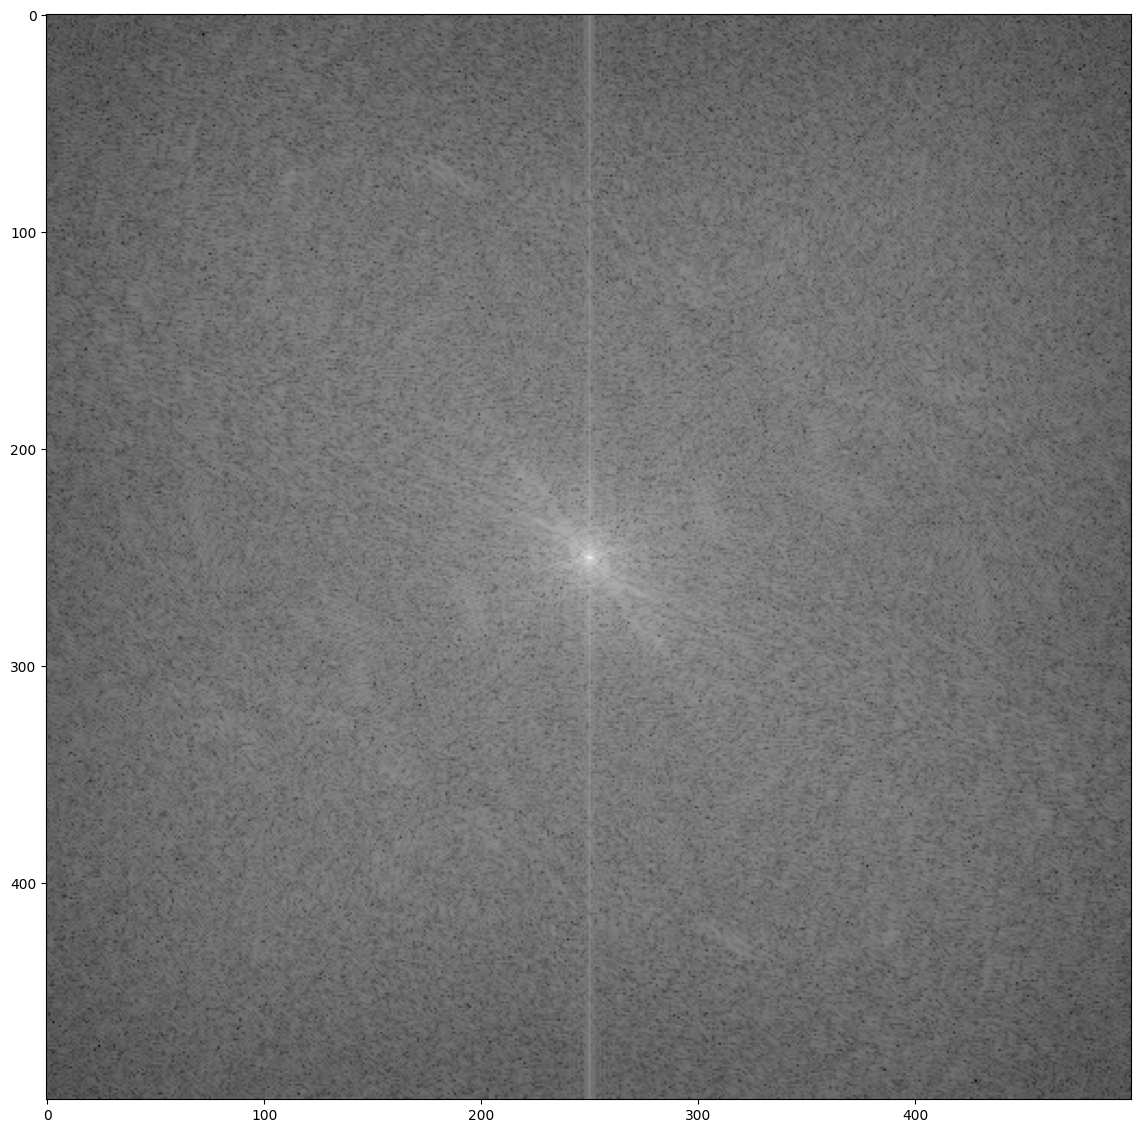

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.fft import fft2, ifft2

bengio = cv2.imread('bengio.jpg', 0)

bengio_array = np.array(bengio)

bengio_fft = np.fft.fftshift(np.fft.fft2(bengio))

plt.figure(figsize=(14, 18))
plt.imshow(np.log(np.abs(bengio_fft)), cmap='gray')
plt.show()

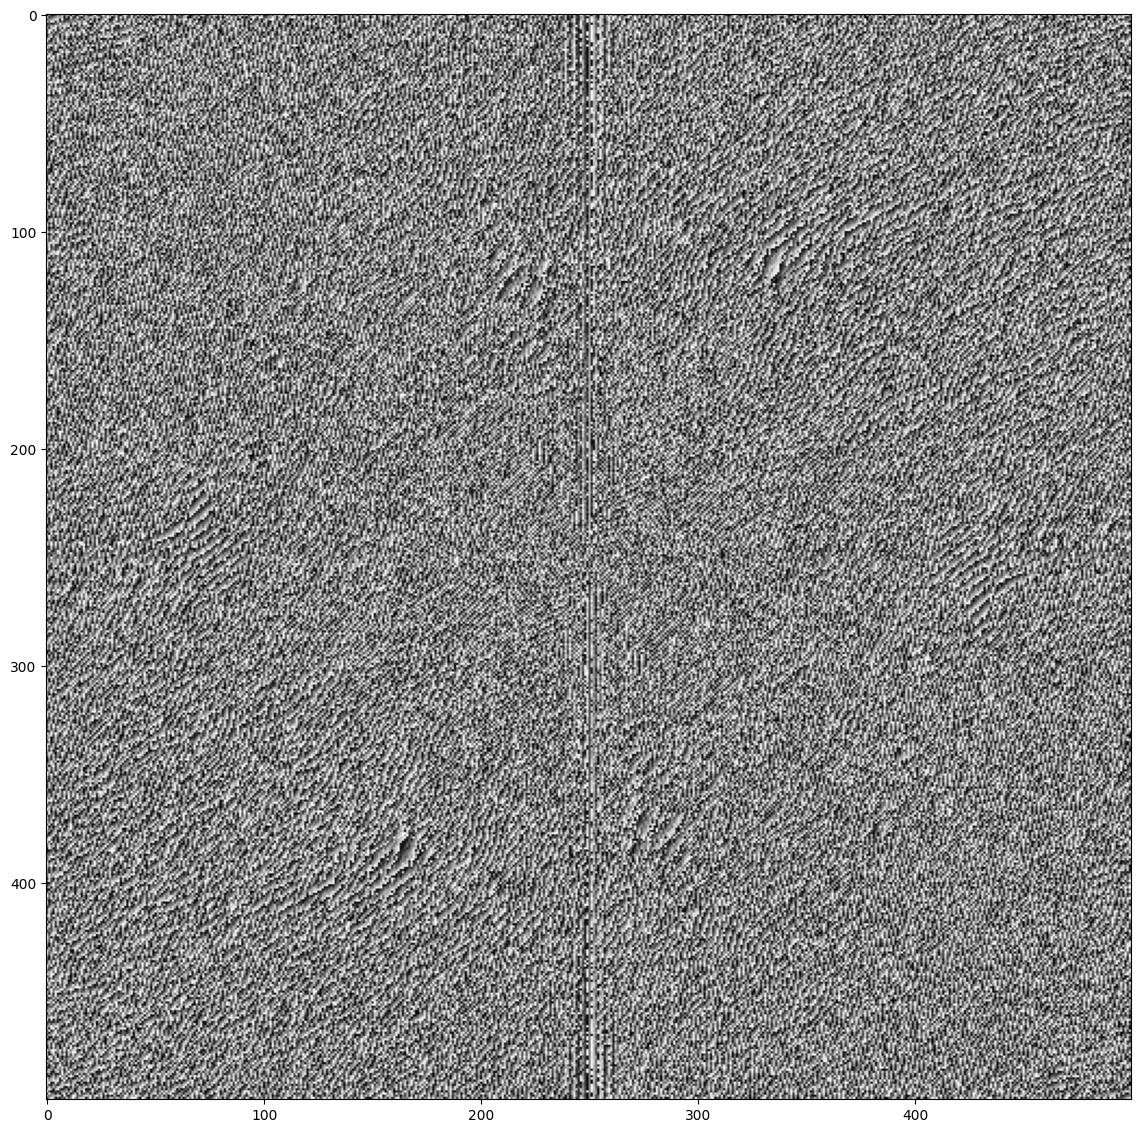

In [16]:
bengio_amplitude = np.sqrt(np.real(bengio_fft) ** 2 + np.imag(bengio_fft) ** 2)
bengio_phase = np.arctan2(np.imag(bengio_fft), np.real(bengio_fft))

plt.figure(figsize=(14, 18))
plt.imshow(np.log(bengio_amplitude + 1e-10), cmap='gray')
plt.imshow(bengio_phase, cmap='gray')
plt.show()

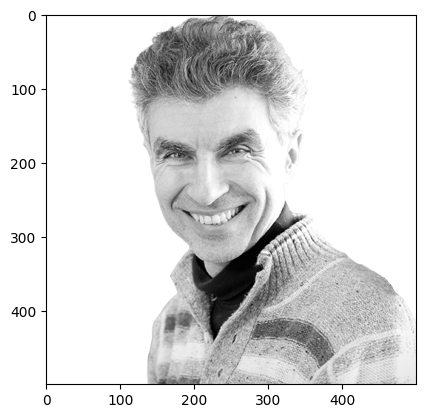

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def low_pass_filter(image, cutoff_frequency):
    F = np.fft.fft2(image)

    F_shifted = np.fft.fftshift(F)

    height, width = image.shape

    mask = np.zeros((height, width), dtype=np.float64)
    cy, cx = height // 2, width // 2
    mask[cy - cutoff_frequency:cy + cutoff_frequency, cx - cutoff_frequency:cx + cutoff_frequency] = 1

    F_filtered_shifted = F_shifted * mask

    F_filtered = np.fft.ifftshift(F_filtered_shifted)

    filtered_image = np.fft.ifft2(F_filtered).real

    return filtered_image


def high_pass_filter(image, cutoff_frequency):
    F = np.fft.fft2(image)

    F_shifted = np.fft.fftshift(F)

    height, width = image.shape

    mask = np.ones((height, width), dtype=np.float64)
    cy, cx = height // 2, width // 2
    mask[cy - cutoff_frequency:cy + cutoff_frequency, cx - cutoff_frequency:cx + cutoff_frequency] = 0

    F_filtered_shifted = F_shifted * mask

    F_filtered = np.fft.ifftshift(F_filtered_shifted)

    filtered_image = np.fft.ifft2(F_filtered).real

    return filtered_image


image = cv2.imread('bengio.jpg', 0)

plt.imshow(image, cmap='gray')
print('main image')
plt.show()


low filter


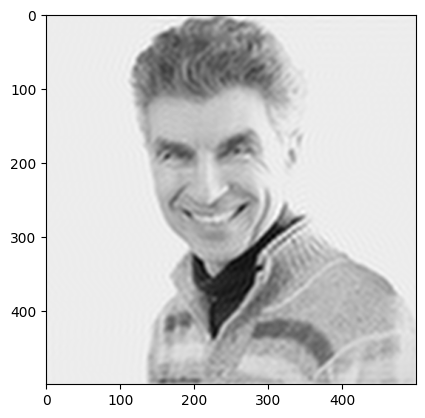

In [28]:
low_pass_filtered_image = low_pass_filter(image, 50)
plt.imshow(low_pass_filtered_image, cmap='gray')
print('low filter')
plt.show()


high filter


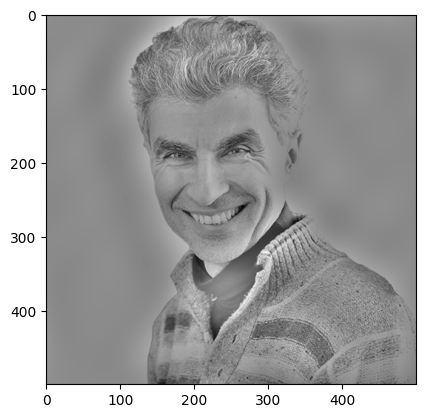

In [27]:
high_pass_filtered_image = high_pass_filter(image, 5)

plt.imshow(high_pass_filtered_image, cmap='gray')
print('high filter')
plt.show()